## Importing Required Libraries

In [1]:
import pandas as pd #data manipulations
import numpy as np #numerical operations
import matplotlib.pyplot as plt #visualization 
import seaborn as sns #visualization
import re #regular expresions
sns.set_style('whitegrid') #theme 

## Loading Dataset

In [51]:
df = pd.read_csv('kidney_disease.csv')

In [52]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [10]:
df.shape

(400, 26)

we can see that there are 400 rows and 26 columns.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
id                400 non-null int64
age               391 non-null float64
bp                388 non-null float64
sg                353 non-null float64
al                354 non-null float64
su                351 non-null float64
rbc               248 non-null object
pc                335 non-null object
pcc               396 non-null object
ba                396 non-null object
bgr               356 non-null float64
bu                381 non-null float64
sc                383 non-null float64
sod               313 non-null float64
pot               312 non-null float64
hemo              348 non-null float64
pcv               330 non-null object
wc                295 non-null object
rc                270 non-null object
htn               398 non-null object
dm                398 non-null object
cad               398 non-null object
appet             399 non-null object
pe         

In [ ]:
 id, age, bp, sg, al, su, bgr, bu, sc, sod, pot, hemo are Numerical Columns(Int or Float datatype).
 rbc, pc, pcc, ba, pcv, wc, rc, htn, dm, cad, appet, pe, ane, classification are Categorical Columns(object datatype).

## Columns Information

            age		-	age	
			bp		-	blood pressure
			sg		-	specific gravity
			al		-   	albumin
			su		-	sugar
			rbc		-	red blood cells
			pc		-	pus cell
			pcc		-	pus cell clumps
			ba		-	bacteria
			bgr		-	blood glucose random
			bu		-	blood urea
			sc		-	serum creatinine
			sod		-	sodium
			pot		-	potassium
			hemo		-	hemoglobin
			pcv		-	packed cell volume
			wc		-	white blood cell count
			rc		-	red blood cell count
			htn		-	hypertension
			dm		-	diabetes mellitus
			cad		-	coronary artery disease
			appet		-	appetite
			pe		-	pedal edema
			ane		-	anemia
			class		-	class	

In [6]:
df.columns #Columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [9]:
df.index

RangeIndex(start=0, stop=400, step=1)

In [32]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


# Exploratory Data Analysis 

## Checking for Missing Values

In [42]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [43]:
np.round(df.isnull().sum()/len(df),2) * 100 

id                 0.0
age                2.0
bp                 3.0
sg                12.0
al                12.0
su                12.0
rbc               38.0
pc                16.0
pcc                1.0
ba                 1.0
bgr               11.0
bu                 5.0
sc                 4.0
sod               22.0
pot               22.0
hemo              13.0
pcv               18.0
wc                26.0
rc                32.0
htn                0.0
dm                 0.0
cad                0.0
appet              0.0
pe                 0.0
ane                0.0
classification     0.0
dtype: float64

We can perceive that rbc (red blood cells) column consists of 38% missing values.

rc column has 32% of missing values.

wc column has 26% of missing values.

sod and pot columns consists of 22% missing values.

pcv column has 18% of missing values.

pc column consists of 16% missing values.

sg, al, su columns consists of 12% missing values.

remaining columns have minor missing values but we have to handle them. 

## Treating Missing Values

if more than 40% - 50% of missing values are existed in columns. then we have to simply drop the  entire columns. 

In remaining cases, we have to apply some statistical replacement techniques (min,max,mode) or use some predictive models to predict the missing values.

## Droping rbc column from dataframe

In [53]:
df = df.drop('rbc',axis=1)

We are going to drop rbc(red blood cells) column, because it has almost 40% of missing values.

In [72]:
df.head()

,id,age,bp,sg,al,su,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


## Imputing Missing Values

We had Categorical and Numerical Columns. While imputing missing values we have to use different method on categorical and numerical.

When coming to Categorical datatype columns must be replaced by using Statistical measure "Mode". Numerical columns should be treated with "Mean" or "Median".

In [54]:
l = df.isnull().sum()
l = list(l)

In [55]:
cols = df.columns

In [56]:
missing_values_columns = []
for i,j in zip(cols,l):
    if j > 0:
        missing_values_columns.append(i)

In [57]:
print(missing_values_columns)

['age', 'bp', 'sg', 'al', 'su', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']


 Here are we go, we got the missing valued columns.

## Dividing Categorical and Numerical columns

In [58]:
categorical_columns = [] 
numerical_columns = [] 
for i in missing_values_columns:
    if df[i].dtype == 'O':
        categorical_columns.append(i)
    else:
        numerical_columns.append(i)

In [59]:
print(numerical_columns) #Numerical columns

['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']


In [60]:
print(categorical_columns) #Categorical Columns

['pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']


## Imputing Categorical Columns 

In [61]:
for i in categorical_columns:
    df[i].fillna(df[i].mode()[0],inplace=True)
    print(i,df[i].isnull().sum())

pc 0
pcc 0
ba 0
pcv 0
wc 0
rc 0
htn 0
dm 0
cad 0
appet 0
pe 0
ane 0


 We have imputed Categorical Columns at once

## Imputing Numerical Columns

In [62]:
print(numerical_columns)

['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']


### Column : age

In [63]:
df.age.dtype

dtype('float64')

age column has values of float datatype 

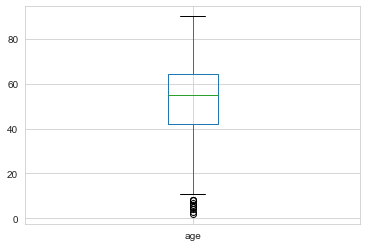

In [64]:
df.age.plot.box()

Here we can see that age columns has outliers. so have to proceed with "Median". because Mean is prune to outliers.

In [65]:
df.age.describe()

count    391.000000
mean      51.483376
std       17.169714
min        2.000000
25%       42.000000
50%       55.000000
75%       64.500000
max       90.000000
Name: age, dtype: float64

 mean : 51.48 and Median : 55.00 

In [66]:
df.age.fillna(df.age.median(),inplace=True)

In [67]:
df.age.isnull().sum()

0

 we had imputed the age column with "Median" value of age column.  

## Column : bp 

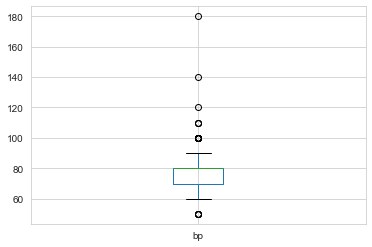

In [68]:
df.bp.plot.box()

We can see that there are lot of outliers.So, we have to use Median value to replacement.   

In [69]:
df.bp.fillna(df.bp.median(),inplace=True)

In [70]:
df.bp.isnull().sum()

0

## Column : Sg

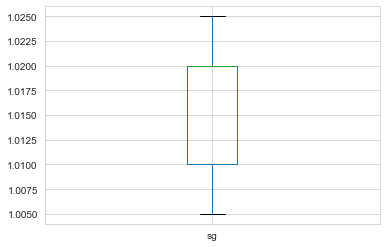

In [71]:
df.sg.plot.box()

There are no outliers. so we can use Mean value for replacement.

In [72]:
df.sg.fillna(df.sg.mean(),inplace=True)

In [73]:
df.sg.isnull().sum()

0

## Column : al 

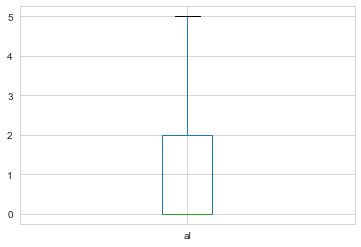

In [74]:
df.al.plot.box()

In [75]:
df.al.describe()

count    354.000000
mean       1.016949
std        1.352679
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max        5.000000
Name: al, dtype: float64

In [76]:
df.al.fillna(df.al.mean(),inplace=True)

In [77]:
df.al.isnull().sum()

0

In [78]:
numerical_columns

['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']

## column : su 

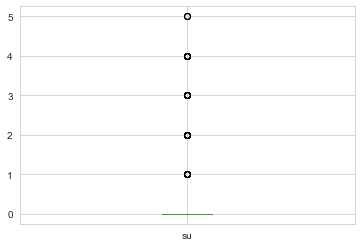

In [79]:
df.su.plot.box()

In [80]:
df.su.describe()

count    351.000000
mean       0.450142
std        1.099191
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        5.000000
Name: su, dtype: float64

In [81]:
df.su.fillna(df.su.mean(),inplace=True)

In [82]:
df.su.isnull().sum()

0

## Column : bgr 

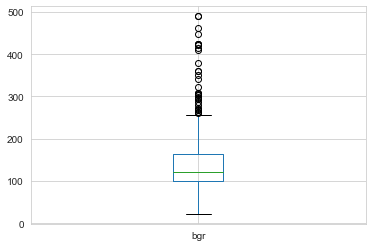

In [83]:
df.bgr.plot.box()

We can see that there are lot of outliers.So we have to proceed with Median Value.

In [84]:
df.bgr.fillna(df.bgr.median(),inplace=True)

In [85]:
df.bgr.isnull().sum()

0

## Column : bu 

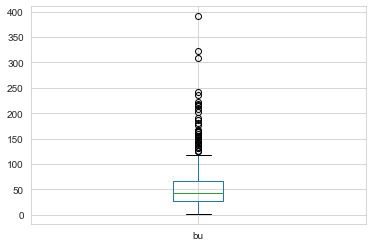

In [86]:
df.bu.plot.box()

We can see that there are lot of outliers.So we have to proceed with Median Value.

In [87]:
df.bu.fillna(df.bu.median(),inplace=True)

In [88]:
df.bu.isnull().sum()

0

## column : sc

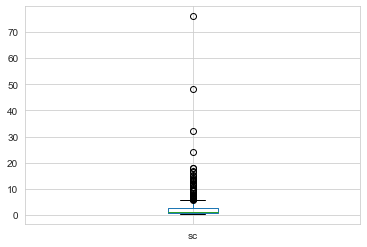

In [89]:
df.sc.plot.box()

We can see that there are lot of outliers.So we have to proceed with Median Value.

In [90]:
df.sc.fillna(df.su.median(),inplace=True)

In [91]:
df.sc.isnull().sum()

0

## Column : sod 

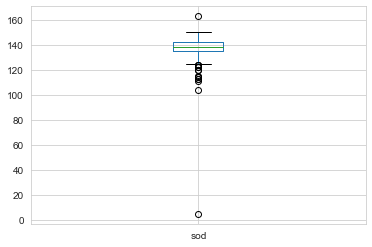

In [92]:
df.sod.plot.box()

 We can see that there are lot of outliers.So we have to proceed with Median Value.

In [93]:
df.sod.fillna(df.sod.median(),inplace=True)

In [94]:
df.sod.isnull().sum()

0

## Column : pot

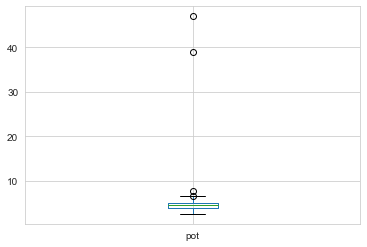

In [95]:
df.pot.plot.box()

We can see that there are outliers.So we have to proceed with Median Value.

In [96]:
df.pot.fillna(df.pot.median(),inplace=True)

In [97]:
df.pot.isnull().sum()

0

## Column : hemo 

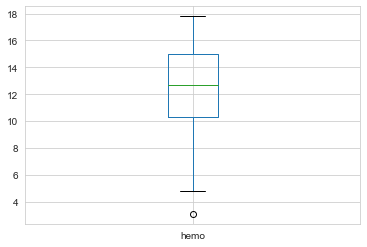

In [98]:
df.hemo.plot.box()

We can see that there is outlier.So we have to proceed with Median Value.

In [99]:
df.hemo.fillna(df.hemo.median(),inplace=True)

In [100]:
df.hemo.isnull().sum()

0

In [101]:
df.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

 We can see that there were no missing values.

## Uni-variate Analysis

In [102]:
df.head()

,id,age,bp,sg,al,su,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,normal,notpresent,notpresent,121.0,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,notpresent,notpresent,423.0,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


## Uni-Variate Analysis on Categorical Columns

### Bar Chart 

Bar chart on Pc Column: Pus cells  

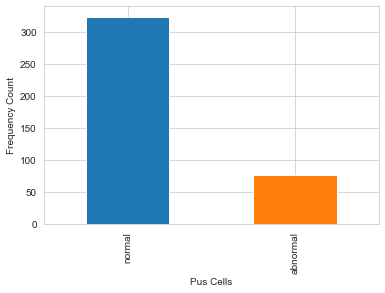

In [22]:
df.pc.value_counts().plot.bar()
plt.xlabel("Pus Cells")
plt.ylabel("Frequency Count")
plt.show()

In [23]:
df.pc.value_counts()

normal      324
abnormal     76
Name: pc, dtype: int64

We can see that there are 324 normal pus cells and 76 abnormal pus cells. 

## Pie Chart

Pie Chart on pus cells column.

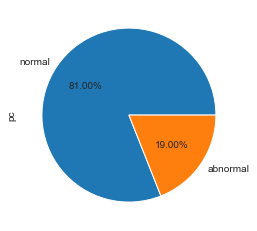

In [9]:
df.pc.value_counts().plot.pie(autopct='%0.2f%%')

We can see that there are 81.00% of normal pus cells and 19.00% abnormal pus cells. 

## Count Plot 

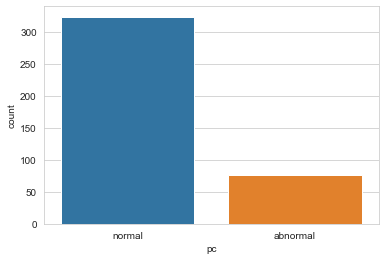

In [10]:
sns.countplot(x='pc',data=df)

We can percieve that Normal pus cells are greater that Abnormal pus cells.

#### Bar Chart on pcc (pus cell clumps(groups)) column

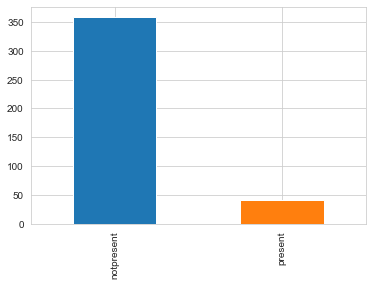

In [12]:
df.pcc.value_counts().plot.bar()

In [13]:
df.pcc.value_counts()

notpresent    358
present        42
Name: pcc, dtype: int64

We can see that there are 358 patients who doesn't had pus cell clumps and 42 patients had pus cell clumps.

#### Pie chart on pcc pus cell clumps(groups)

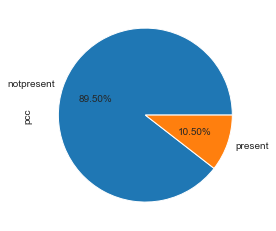

In [15]:
df.pcc.value_counts().plot.pie(autopct = '%0.2f%%')

There 89.50% of patients who had no pus cell clumps and 10.50% of patients had pus cell clumps.

#### Bar chart on ba (bacteria)

In [18]:
df.ba.value_counts()

notpresent    378
present        22
Name: ba, dtype: int64

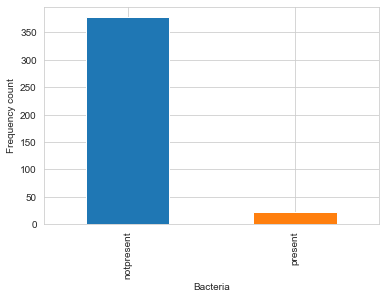

In [21]:
df.ba.value_counts().plot.bar()
plt.xlabel('Bacteria')
plt.ylabel('Frequency count')
plt.show()

We can see that there are 378 patients who doesn't had bacteria and 22 patients had bacteria in their kidney.

#### pie chart on ba (bacteria) column

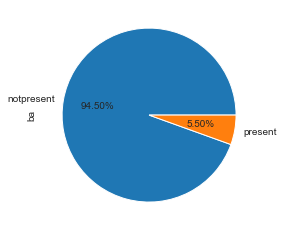

In [22]:
df.ba.value_counts().plot.pie(autopct='%0.2f%%')

There 94.50% of patients who had no bacteria in their kidneys and 5.50% of patients had bacteria in their kidneys.

#### Bar chart on htn (hypertension)

In [24]:
df.htn.value_counts()

no     253
yes    147
Name: htn, dtype: int64

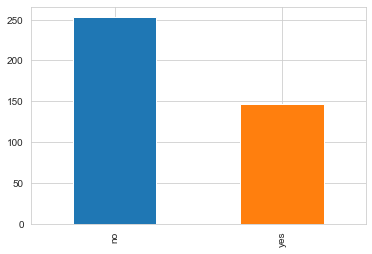

In [25]:
df.htn.value_counts().plot.bar()

 We can see that there are 253 patients who doesn't had hypertension and 147 patients had hypertension.

#### Bar chart on cad ( coronary artery disease)

In [32]:
df.cad.value_counts()

no      364
yes      34
\tno      2
Name: cad, dtype: int64

C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


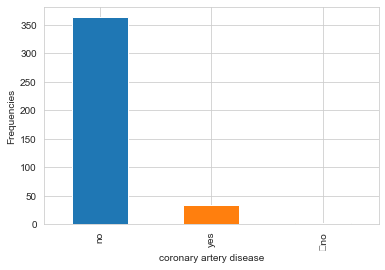

In [6]:
df.cad.value_counts().plot.bar()
plt.xlabel('coronary artery disease')
plt.ylabel('Frequencies')
plt.show()

 We can see that there are 364 patients who doesn't had coronary artery disease and 34 patients had coronary artery disease.

#### Bar Chart on appet (appetite)

In [8]:
df.appet.value_counts()

good    318
poor     82
Name: appet, dtype: int64

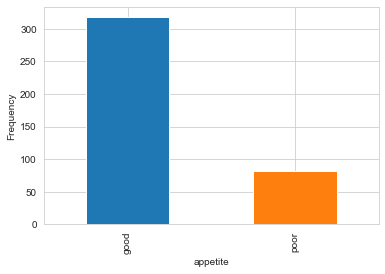

In [11]:
df.appet.value_counts().plot.bar()
plt.xlabel('appetite')
plt.ylabel('Frequency')
plt.show()

#### Pie Chart on appet(appetite) column

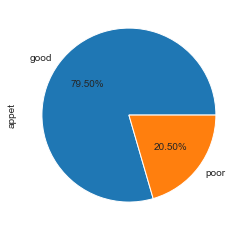

In [17]:
df.appet.value_counts().plot.pie(autopct='%0.2f%%')

#### Bar chart on pe (pedal edema)

In [19]:
df.pe.value_counts()

no     324
yes     76
Name: pe, dtype: int64

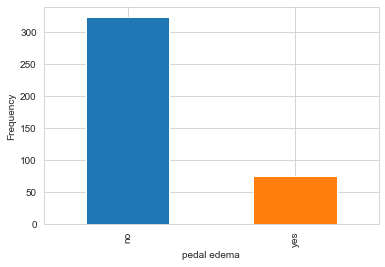

In [23]:
df.pe.value_counts().plot.bar()
plt.xlabel('pedal edema')
plt.ylabel('Frequency')
plt.show()

#### Bar Chart on ane (Anemia)

In [25]:
df.ane.value_counts()

no     340
yes     60
Name: ane, dtype: int64

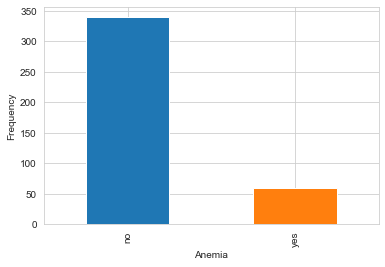

In [27]:
df.ane.value_counts().plot.bar()
plt.xlabel('Anemia')
plt.ylabel('Frequency')
plt.show()

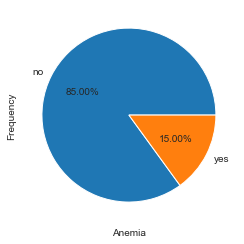

In [29]:
df.ane.value_counts().plot.pie(autopct='%0.2f%%')
plt.xlabel('Anemia')
plt.ylabel('Frequency')
plt.show()

#### Uni-Variate analysis on Classification columns

In [30]:
df.classification.value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

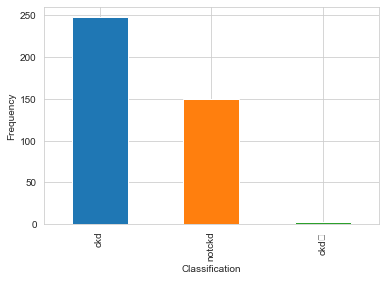

In [33]:
df.classification.value_counts().plot.bar()
plt.xlabel('Classification')
plt.ylabel('Frequency')
plt.show()

 We can see that this is a Binary Classification, but there is some error class which we have to remove it.

In [103]:
df.classification = df.classification.replace('ckd\t',np.nan)

In [104]:
df.classification.unique()

array(['ckd', nan, 'notckd'], dtype=object)

In [107]:
df.classification.fillna(df.classification.mode()[0],inplace=True)

In [108]:
df.classification.unique()

array(['ckd', 'notckd'], dtype=object)

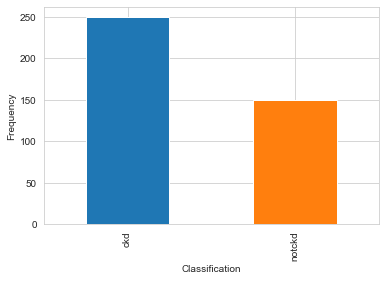

In [109]:
df.classification.value_counts().plot.bar()
plt.xlabel('Classification')
plt.ylabel('Frequency')
plt.show()

It is a Binary Classification.

## Uni-Variate on Numerical Columns

In [53]:
df.head(1)

,id,age,bp,sg,al,su,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.02,1.0,0.0,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd


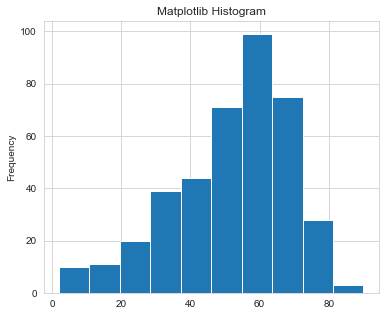

C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


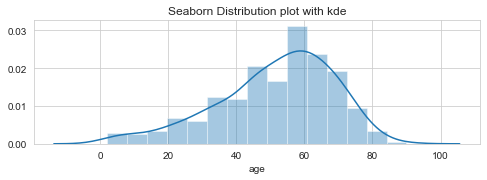

In [65]:
plt.figure(1,figsize=(6,5))
#subplot-1
plt.subplot(1,1,1)
plt.title('Matplotlib Histogram')
df.age.plot.hist()
plt.show()

plt.figure(2,figsize=(8,5))
#subplot-2
plt.subplot(2,1,2)
plt.title('Seaborn Distribution plot with kde')
sns.distplot(df.age)
plt.show()

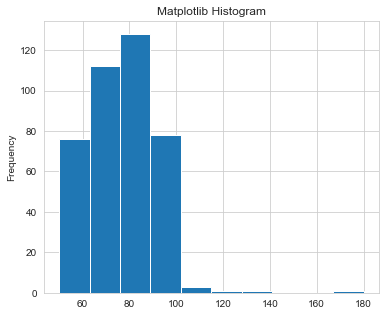

C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


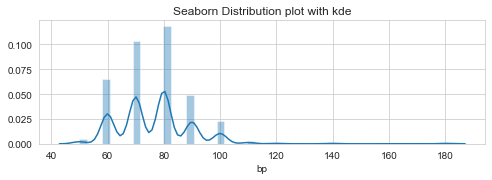

In [66]:
plt.figure(1,figsize=(6,5))
#subplot-1
plt.subplot(1,1,1)
plt.title('Matplotlib Histogram')
df.bp.plot.hist()
plt.show()

plt.figure(2,figsize=(8,5))
#subplot-2
plt.subplot(2,1,2)
plt.title('Seaborn Distribution plot with kde')
sns.distplot(df.bp)
plt.show()

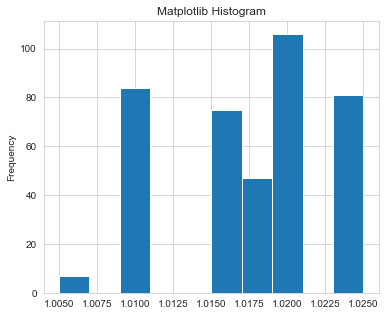

C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


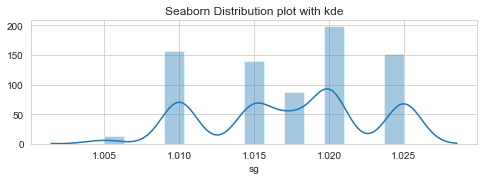

In [67]:
plt.figure(1,figsize=(6,5))
#subplot-1
plt.subplot(1,1,1)
plt.title('Matplotlib Histogram')
df.sg.plot.hist()
plt.show()

plt.figure(2,figsize=(8,5))
#subplot-2
plt.subplot(2,1,2)
plt.title('Seaborn Distribution plot with kde')
sns.distplot(df.sg)
plt.show()

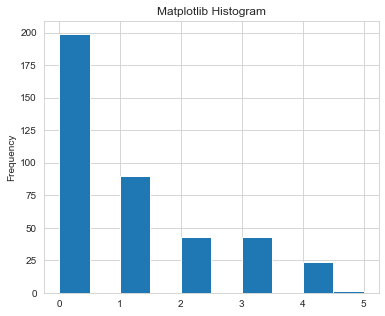

C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


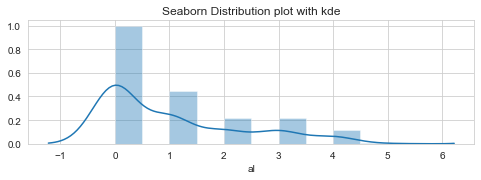

In [86]:
plt.figure(1,figsize=(6,5))
#subplot-1
plt.subplot(1,1,1)
plt.title('Matplotlib Histogram')
df.al.plot.hist()
plt.show()

plt.figure(2,figsize=(8,5))
#subplot-2
plt.subplot(2,1,2)
plt.title('Seaborn Distribution plot with kde')
sns.distplot(df.al)
plt.show()

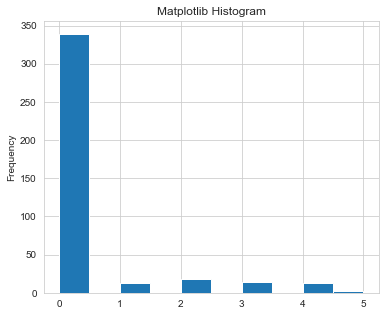

C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


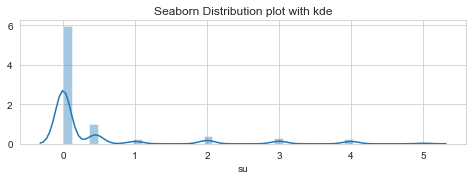

In [89]:
plt.figure(1,figsize=(6,5))
#subplot-1
plt.subplot(1,1,1)
plt.title('Matplotlib Histogram')
df.su.plot.hist()
plt.show()

plt.figure(2,figsize=(8,5))
#subplot-2
plt.subplot(2,1,2)
plt.title('Seaborn Distribution plot with kde')
sns.distplot(df.su)
plt.show()

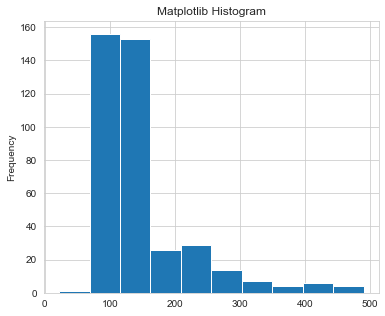

C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


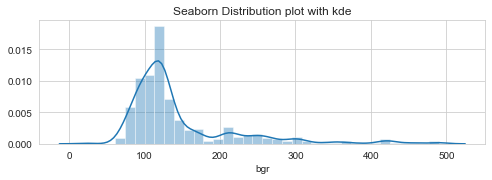

In [90]:
plt.figure(1,figsize=(6,5))
#subplot-1
plt.subplot(1,1,1)
plt.title('Matplotlib Histogram')
df.bgr.plot.hist()
plt.show()

plt.figure(2,figsize=(8,5))
#subplot-2
plt.subplot(2,1,2)
plt.title('Seaborn Distribution plot with kde')
sns.distplot(df.bgr)
plt.show()

In [88]:
df.head(1)

,id,age,bp,sg,al,su,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.02,1.0,0.0,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd


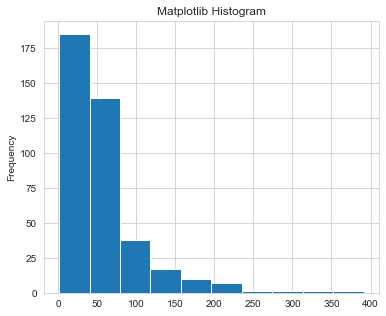

C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


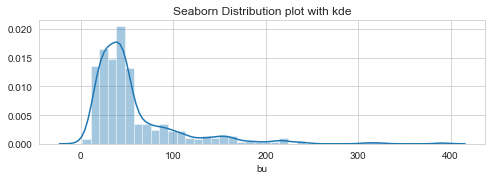

In [99]:
plt.figure(1,figsize=(6,5))
#subplot-1
plt.subplot(1,1,1)
plt.title('Matplotlib Histogram')
df.bu.plot.hist()
plt.show()

plt.figure(2,figsize=(8,5))
#subplot-2
plt.subplot(2,1,2)
plt.title('Seaborn Distribution plot with kde')
sns.distplot(df.bu)
plt.show()

In [68]:
df.wc.unique()

array(['7800', '6000', '7500', '6700', '7300', '9800', '6900', '9600',
       '12100', '4500', '12200', '11000', '3800', '11400', '5300', '9200',
       '6200', '8300', '8400', '10300', '9100', '7900', '6400', '8600',
       '18900', '21600', '4300', '8500', '11300', '7200', '7700', '14600',
       '6300', '\t6200', '7100', '11800', '9400', '5500', '5800', '13200',
       '12500', '5600', '7000', '11900', '10400', '10700', '12700',
       '6800', '6500', '13600', '10200', '9000', '14900', '8200', '15200',
       '5000', '16300', '12400', '\t8400', '10500', '4200', '4700',
       '10900', '8100', '9500', '2200', '12800', '11200', '19100', '\t?',
       '12300', '16700', '2600', '26400', '8800', '7400', '4900', '8000',
       '12000', '15700', '4100', '5700', '11500', '5400', '10800', '9900',
       '5200', '5900', '9300', '9700', '5100', '6600'], dtype=object)

Here we can see that  '\t6200' and '\t?' we have to replace them

In [112]:
df.wc = df.wc.replace('?',np.nan)

In [113]:
df.wc.unique()

array(['7800', '6000', '7500', '6700', '7300', '9800', '6900', '9600',
       '12100', '4500', '12200', '11000', '3800', '11400', '5300', '9200',
       '6200', '8300', '8400', '10300', '9100', '7900', '6400', '8600',
       '18900', '21600', '4300', '8500', '11300', '7200', '7700', '14600',
       '6300', '7100', '11800', '9400', '5500', '5800', '13200', '12500',
       '5600', '7000', '11900', '10400', '10700', '12700', '6800', '6500',
       '13600', '10200', '9000', '14900', '8200', '15200', '5000',
       '16300', '12400', '10500', '4200', '4700', '10900', '8100', '9500',
       '2200', '12800', '11200', '19100', nan, '12300', '16700', '2600',
       '26400', '8800', '7400', '4900', '8000', '12000', '15700', '4100',
       '5700', '11500', '5400', '10800', '9900', '5200', '5900', '9300',
       '9700', '5100', '6600'], dtype=object)

In [110]:
df.wc = df.wc.apply(lambda t: re.sub('\t','',str(t)))

In [111]:
df.wc.unique()

array(['7800', '6000', '7500', '6700', '7300', '9800', '6900', '9600',
       '12100', '4500', '12200', '11000', '3800', '11400', '5300', '9200',
       '6200', '8300', '8400', '10300', '9100', '7900', '6400', '8600',
       '18900', '21600', '4300', '8500', '11300', '7200', '7700', '14600',
       '6300', '7100', '11800', '9400', '5500', '5800', '13200', '12500',
       '5600', '7000', '11900', '10400', '10700', '12700', '6800', '6500',
       '13600', '10200', '9000', '14900', '8200', '15200', '5000',
       '16300', '12400', '10500', '4200', '4700', '10900', '8100', '9500',
       '2200', '12800', '11200', '19100', '?', '12300', '16700', '2600',
       '26400', '8800', '7400', '4900', '8000', '12000', '15700', '4100',
       '5700', '11500', '5400', '10800', '9900', '5200', '5900', '9300',
       '9700', '5100', '6600'], dtype=object)

In [114]:
df.wc = df.wc.replace(np.nan,df.wc.mode()[0])

In [115]:
df.wc.unique()

array(['7800', '6000', '7500', '6700', '7300', '9800', '6900', '9600',
       '12100', '4500', '12200', '11000', '3800', '11400', '5300', '9200',
       '6200', '8300', '8400', '10300', '9100', '7900', '6400', '8600',
       '18900', '21600', '4300', '8500', '11300', '7200', '7700', '14600',
       '6300', '7100', '11800', '9400', '5500', '5800', '13200', '12500',
       '5600', '7000', '11900', '10400', '10700', '12700', '6800', '6500',
       '13600', '10200', '9000', '14900', '8200', '15200', '5000',
       '16300', '12400', '10500', '4200', '4700', '10900', '8100', '9500',
       '2200', '12800', '11200', '19100', '12300', '16700', '2600',
       '26400', '8800', '7400', '4900', '8000', '12000', '15700', '4100',
       '5700', '11500', '5400', '10800', '9900', '5200', '5900', '9300',
       '9700', '5100', '6600'], dtype=object)

In [116]:
df.wc = df.wc.astype(int)

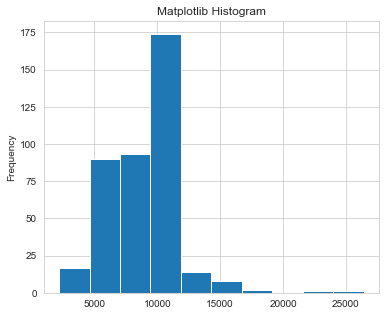

C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


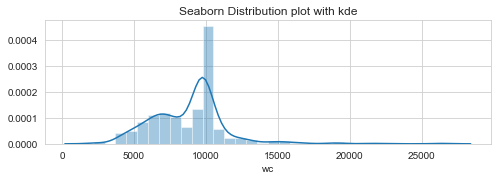

In [96]:
plt.figure(1,figsize=(6,5))
#subplot-1
plt.subplot(1,1,1)
plt.title('Matplotlib Histogram')
df.wc.plot.hist()
plt.show()

plt.figure(2,figsize=(8,5))
#subplot-2
plt.subplot(2,1,2)
plt.title('Seaborn Distribution plot with kde')
sns.distplot(df.wc)
plt.show()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
id                400 non-null int64
age               400 non-null float64
bp                400 non-null float64
sg                400 non-null float64
al                400 non-null float64
su                400 non-null float64
pc                400 non-null object
pcc               400 non-null object
ba                400 non-null object
bgr               400 non-null float64
bu                400 non-null float64
sc                400 non-null float64
sod               400 non-null float64
pot               400 non-null float64
hemo              400 non-null float64
pcv               400 non-null object
wc                400 non-null int32
rc                400 non-null object
htn               400 non-null object
dm                400 non-null object
cad               400 non-null object
appet             400 non-null object
pe                400 non-null object
ane         

In [27]:
df.head(1)

,id,age,bp,sg,al,su,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.02,1.0,0.0,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd


In [31]:
df.pcv.dtype

dtype('O')

In [97]:
df.pcv.unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', '41',
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '\t?', '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '26', '15',
       '21', '43', '20', '\t43', '47', '9', '49', '50', '53', '51', '54'],
      dtype=object)

In [117]:
df.pcv = df.pcv.apply(lambda t: re.sub('\t','',str(t)))

In [118]:
df.pcv.unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', '41',
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '?', '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '26', '15',
       '21', '43', '20', '47', '9', '49', '50', '53', '51', '54'],
      dtype=object)

In [119]:
df.pcv = df.pcv.replace('?',df.pcv.mode()[0])

In [120]:
df.pcv = df.pcv.astype('int')

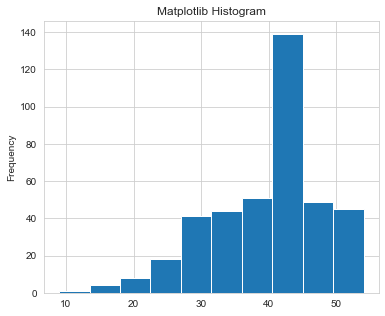

C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


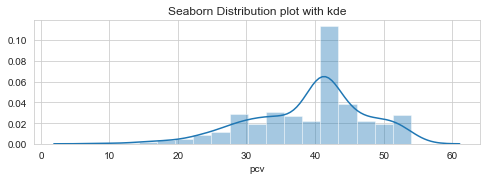

In [102]:
plt.figure(1,figsize=(6,5))
#subplot-1
plt.subplot(1,1,1)
plt.title('Matplotlib Histogram')
df.pcv.plot.hist()
plt.show()

plt.figure(2,figsize=(8,5))
#subplot-2
plt.subplot(2,1,2)
plt.title('Seaborn Distribution plot with kde')
sns.distplot(df.pcv)
plt.show()

In [39]:
df.rc.unique()

array(['5.2', nan, '3.9', '4.6', '4.4', '5', '4.0', '3.7', '3.8', '3.4',
       '2.6', '2.8', '4.3', '3.2', '3.6', '4', '4.1', '4.9', '2.5', '4.2',
       '4.5', '3.1', '4.7', '3.5', '6.0', '5.0', '2.1', '5.6', '2.3',
       '2.9', '2.7', '8.0', '3.3', '3.0', '3', '2.4', '4.8', '\t?', '5.4',
       '6.1', '6.2', '6.3', '5.1', '5.8', '5.5', '5.3', '6.4', '5.7',
       '5.9', '6.5'], dtype=object)

In [121]:
df.rc = df.rc.apply(lambda t: re.sub('\t','',str(t)))

In [122]:
df.rc.unique()

array(['5.2', '3.9', '4.6', '4.4', '5', '4.0', '3.7', '3.8', '3.4', '2.6',
       '2.8', '4.3', '3.2', '3.6', '4', '4.1', '4.9', '2.5', '4.2', '4.5',
       '3.1', '4.7', '3.5', '6.0', '5.0', '2.1', '5.6', '2.3', '2.9',
       '2.7', '8.0', '3.3', '3.0', '3', '2.4', '4.8', '?', '5.4', '6.1',
       '6.2', '6.3', '5.1', '5.8', '5.5', '5.3', '6.4', '5.7', '5.9',
       '6.5'], dtype=object)

In [123]:
df.rc = df.rc.replace('?',df.rc.mode()[0])

In [124]:
df.rc.unique()

array(['5.2', '3.9', '4.6', '4.4', '5', '4.0', '3.7', '3.8', '3.4', '2.6',
       '2.8', '4.3', '3.2', '3.6', '4', '4.1', '4.9', '2.5', '4.2', '4.5',
       '3.1', '4.7', '3.5', '6.0', '5.0', '2.1', '5.6', '2.3', '2.9',
       '2.7', '8.0', '3.3', '3.0', '3', '2.4', '4.8', '5.4', '6.1', '6.2',
       '6.3', '5.1', '5.8', '5.5', '5.3', '6.4', '5.7', '5.9', '6.5'],
      dtype=object)

In [125]:
df.rc = df.rc.astype('float')

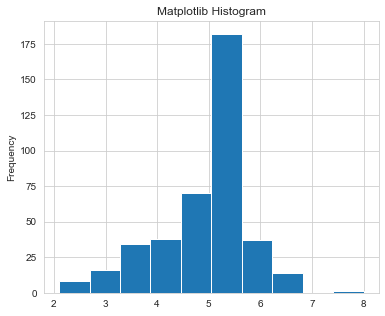

C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


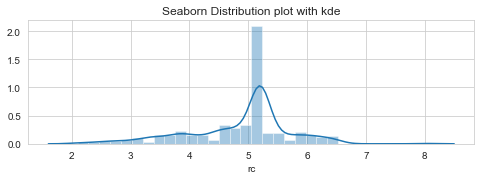

In [108]:
plt.figure(1,figsize=(6,5))
#subplot-1
plt.subplot(1,1,1)
plt.title('Matplotlib Histogram')
df.rc.plot.hist()
plt.show()

plt.figure(2,figsize=(8,5))
#subplot-2
plt.subplot(2,1,2)
plt.title('Seaborn Distribution plot with kde')
sns.distplot(df.rc)
plt.show()

## Treating Categorical Columns

In [126]:
new_df = pd.get_dummies(df,drop_first=True)

In [129]:
new_df.head()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,...,dm_ yes,dm_ yes,dm_no,dm_yes,cad_no,cad_yes,appet_poor,pe_yes,ane_yes,classification_notckd
0,0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,...,0,0,0,1,1,0,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,...,0,0,1,0,1,0,0,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,...,0,0,0,1,1,0,1,0,1,0
3,3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,...,0,0,1,0,1,0,1,1,1,0
4,4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,...,0,0,1,0,1,0,0,0,0,0


In [138]:
new_df.to_csv('Cleaned_dataset.csv')

## Bi-variate Analysis

### Correlation Table

In [139]:
new_df.corr()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,...,dm_ yes,dm_ yes,dm_no,dm_yes,cad_no,cad_yes,appet_poor,pe_yes,ane_yes,classification_notckd
id,1.000000,-0.186274,-0.245378,6.136232e-01,-5.200403e-01,-2.713299e-01,-0.297213,-0.299054,-0.261545,0.316549,...,-0.035914,-7.348780e-02,0.482111,-0.464536,0.222649,-0.205575,-0.374394,-0.308120,-0.273096,0.838528
age,-0.186274,1.000000,0.136316,-1.823640e-01,1.171156e-01,2.074051e-01,0.230731,0.194291,0.138149,-0.086040,...,0.072876,1.014578e-02,-0.353281,0.354314,-0.224422,0.231419,0.156581,0.094772,0.052938,-0.227842
bp,-0.245378,0.136316,1.000000,-1.852223e-01,1.479057e-01,2.002634e-01,0.150180,0.180841,0.142683,-0.100705,...,0.070636,-2.443137e-02,-0.233226,0.219745,-0.092914,0.084135,0.175054,0.056902,0.195134,-0.293693
sg,0.613623,-0.182364,-0.185222,1.000000e+00,-4.666981e-01,-2.879930e-01,-0.308115,-0.274926,-0.206910,0.236087,...,-0.097924,-4.763339e-14,0.405673,-0.380685,0.174989,-0.154803,-0.246822,-0.272476,-0.213276,0.698957
al,-0.520040,0.117116,0.147906,-4.666981e-01,1.000000e+00,2.680698e-01,0.309238,0.406913,0.233678,-0.268868,...,0.110625,9.298016e-17,-0.375981,0.363557,-0.230473,0.236745,0.330562,0.440893,0.282305,-0.599238
su,-0.271330,0.207405,0.200263,-2.879930e-01,2.680698e-01,1.000000e+00,0.636092,0.153448,0.134169,-0.071981,...,-0.015517,4.170361e-17,-0.465341,0.477206,-0.232760,0.246702,0.080648,0.130721,0.066348,-0.327812
bgr,-0.297213,0.230731,0.150180,-3.081152e-01,3.092375e-01,6.360919e-01,1.000000,0.118859,0.069437,-0.130569,...,0.038607,-3.467476e-02,-0.490991,0.503878,-0.196495,0.207020,0.177285,0.094806,0.112449,-0.379321
bu,-0.299054,0.194291,0.180841,-2.749261e-01,4.069132e-01,1.534477e-01,0.118859,1.000000,0.582404,-0.308806,...,-0.008899,9.975996e-02,-0.310838,0.308444,-0.220573,0.224782,0.274123,0.338740,0.436321,-0.369393
sc,-0.261545,0.138149,0.142683,-2.069100e-01,2.336779e-01,1.341689e-01,0.069437,0.582404,1.000000,-0.621538,...,-0.015596,3.865275e-02,-0.207896,0.211733,-0.187251,0.198161,0.162169,0.176311,0.236462,-0.288436
sod,0.316549,-0.086040,-0.100705,2.360871e-01,-2.688683e-01,-7.198068e-02,-0.130569,-0.308806,-0.621538,1.000000,...,0.002843,-3.066022e-02,0.258157,-0.263307,0.214929,-0.221274,-0.158112,-0.150379,-0.198643,0.334900


### Heat Map 

C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


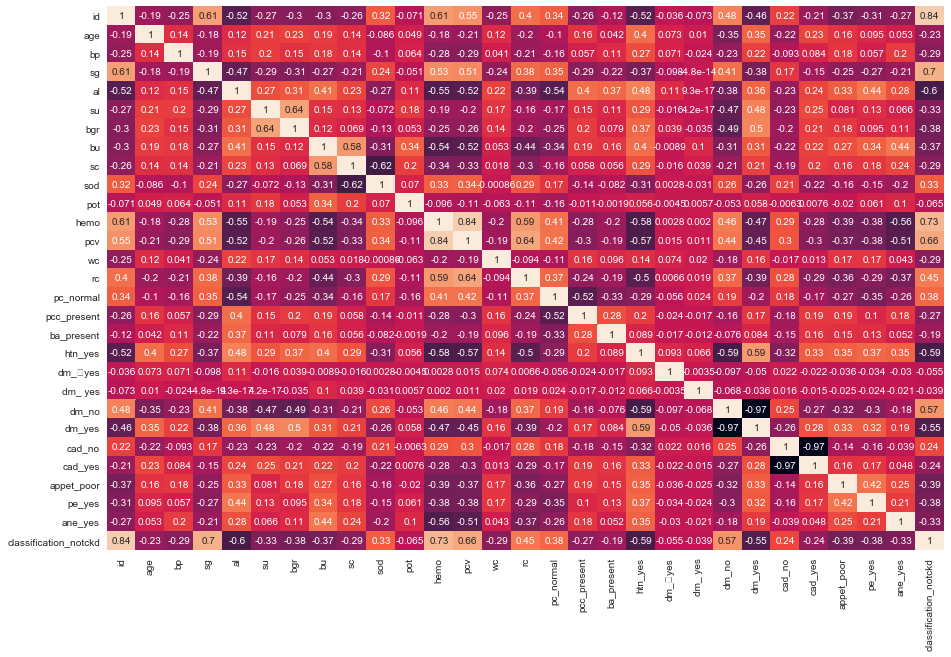

In [144]:
plt.figure(figsize=(15,10))
sns.heatmap(new_df.corr(),annot=True,cbar=False)
plt.show()

## PairPlot

C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional inde

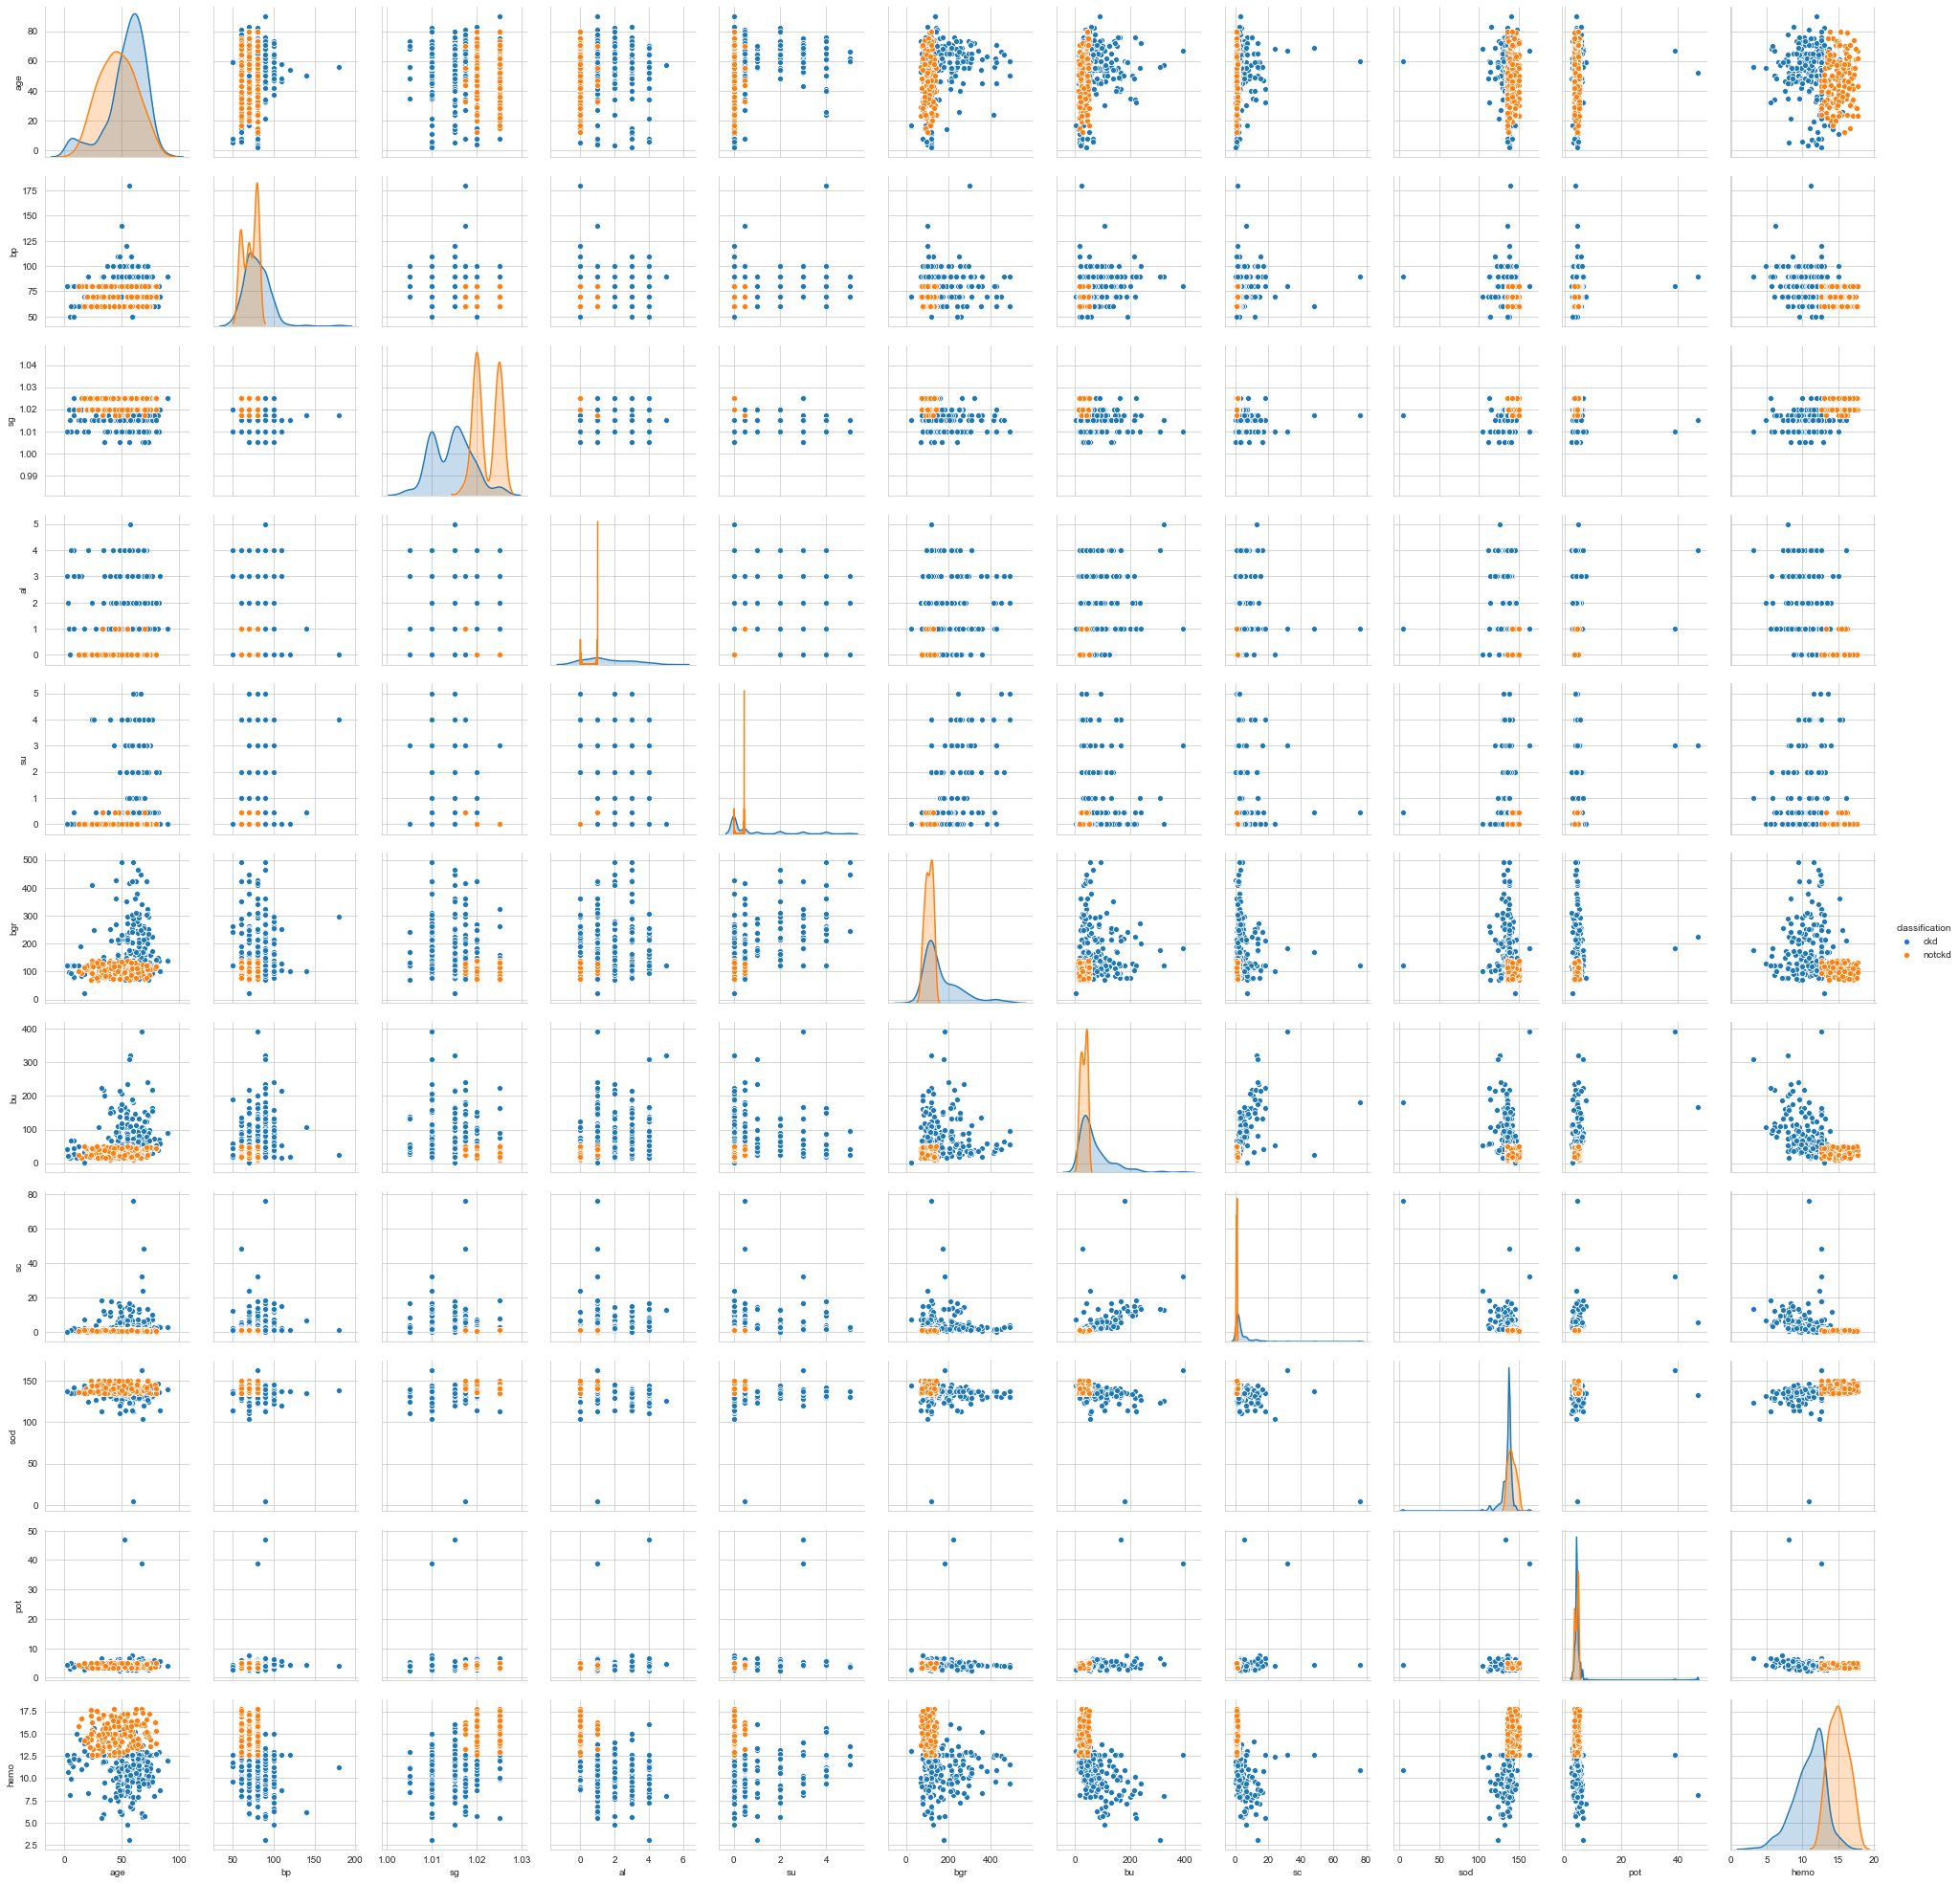

In [145]:
sns.pairplot(df,vars=['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo'],hue='classification')
plt.show()

## Strong Correlated Independent Columns with Dependent Column

In [147]:
Dependent_corr = new_df.corr()

In [153]:
Dependent_corr = Dependent_corr.iloc[-1]

In [160]:
Imp_features = []
for col,corr in zip(Dependent_corr.index,Dependent_corr.values):
    if corr > 0.4 or corr < -0.4:
        Imp_features.append(col)

In [161]:
Imp_features

['id',
 'sg',
 'al',
 'hemo',
 'pcv',
 'rc',
 'htn_yes',
 'dm_no',
 'dm_yes',
 'classification_notckd']

Here we have to drop id column and classification column out of list.

In [164]:
Imp_features.remove('id')

In [166]:
Imp_features.pop()

'classification_notckd'

In [167]:
Imp_features

['sg', 'al', 'hemo', 'pcv', 'rc', 'htn_yes', 'dm_no', 'dm_yes']

These are most important Feactures to classify whether a patient has Chronical Kidney Disease. 

### Independent and Dependent Columns

In [169]:
X = new_df[Imp_features]

In [171]:
y = new_df.classification_notckd

In [172]:
X.head()

,sg,al,hemo,pcv,rc,htn_yes,dm_no,dm_yes
0,1.020,1.0,15.4,44,5.2,1,0,1
1,1.020,4.0,11.3,38,5.2,0,1,0
2,1.010,2.0,9.6,31,5.2,0,0,1
3,1.005,4.0,11.2,32,3.9,1,1,0
4,1.010,2.0,11.6,35,4.6,0,1,0


In [173]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: classification_notckd, dtype: uint8

## Splitting Dataset 

In [174]:
from sklearn.model_selection import train_test_split

In [176]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [177]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(280, 8) (120, 8) (280,) (120,)


## Model Buliding 

In [178]:
from sklearn.ensemble import RandomForestClassifier

In [179]:
rf_clg = RandomForestClassifier()

In [180]:
rf_clg.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [182]:
y_pred = rf_clg.predict(x_test)

## Model Evaluation

In [188]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_curve,roc_auc_score

In [184]:
print(confusion_matrix(y_test,y_pred))

[[66  4]
 [ 1 49]]


In [185]:
accuracy_score(y_test,y_pred)

0.9583333333333334

In [186]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.99      0.94      0.96        70
          1       0.92      0.98      0.95        50

avg / total       0.96      0.96      0.96       120



In [189]:
auc = roc_auc_score(y_test,y_pred)

In [191]:
np.round(auc,2) # area under curve 

0.96

In [192]:
fpr,tpr,_ = roc_curve(y_test,y_pred)

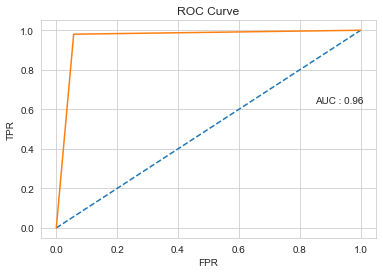

In [225]:
plt.plot([0,1],'--')
plt.plot(fpr,tpr)
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.text(0.85,0.63,f'AUC : {np.round(auc,2)}' )
plt.show()